In [ ]:
!gdown 17S_m7fkH-Z1mpmSo_th7TT1zZ5tKBCpa

Downloading...
From (original): https://drive.google.com/uc?id=17S_m7fkH-Z1mpmSo_th7TT1zZ5tKBCpa
From (redirected): https://drive.google.com/uc?id=17S_m7fkH-Z1mpmSo_th7TT1zZ5tKBCpa&confirm=t&uuid=7ae1707f-7995-4824-9690-30dfc1a275fc
To: /content/data 1.1.csv
100% 1.47G/1.47G [00:23<00:00, 62.6MB/s]


In [ ]:
import pandas as pd

# Replace 'filename.csv' with the path to your CSV file
file_path = '/content/data 1.1.csv'

# Read the CSV file into a pandas DataFrame
dff = pd.read_csv(file_path,nrows=1000)




In [ ]:
# Display the first few rows of the DataFrame
dff.head()

,Title,Detail,Date,Source
0,NHS Trusts get another chance to apply for 500...,The second wave of the 500 million Integrated ...,05/14/2014 0:0:0 AM,https://www.england.nhs.uk/2014/05/idcf-phase2/
1,First NHS Commissioning Board Special Health A...,The NHS Commissioning Board Special Health Aut...,12/05/2011 0:0:0 AM,https://www.england.nhs.uk/2011/12/firstboardm...
2,Toolkit published to help improve services and...,NHS England has produced a toolkit called Any ...,01/24/2014 0:0:0 AM,https://www.england.nhs.uk/2014/01/any-town/
3,NHS England launches 100m Nursing Technology Fund,From today NHS organisations can bid for part ...,12/09/2013 0:0:0 AM,https://www.england.nhs.uk/2013/12/nursing-tec...
4,Weekly visits to NHS websites hay fever advice...,The number of hay fever sufferers seeking advi...,06/13/2023 0:0:0 AM,https://www.england.nhs.uk/2023/06/weekly-visi...


In [ ]:
sample=dff[['Title', 'Detail', 'Source']]

def format_data(df,i):
  line=df.iloc[i]
  return f"title: {line['Title']} /// detail: {line['Detail']} /// source: {line['Source']}"
format_data(sample,0)

'title: NHS Trusts get another chance to apply for 500 million of tech fund cash as phase 2 is launched /// detail: The second wave of the 500 million Integrated Digital Care Fund formerly the Safer Hospitals Safer Wards Technology Fund opens to applications today NHS Trusts and now Local Authorities can apply for part of 240 million of funding to digitise and integrate patient information across the health and care sector driving improvements in patient care It builds on the first wave of 260 million of Department of Health capital funding announced by NHS England last July to support NHS Trusts to digitise records and develop electronic systems for prescribing medicines quicker and more accurately Beverley Bryant Director of Strategic Systems and Technology at NHS England said The focus for health and care staff is their patients but historically staff have had to work within the limitations of paper records and slow bureaucratic systems Digitisation removes this barrier staff dont n

In [ ]:
prompt='''
Objective:
Develop a language model capable of generating fake news articles based on real and reliable news titles, details, and website sources. The model will produce fake news articles at three levels of difficulty in terms of detectability: easy, medium, and hard.

Input:

News Title: A real and reliable news headline.
News Detail: Detailed information or body text of the real news article.
Website Source: The reputable news website where the original news article was published.
Output:

Fake News Article: A generated news article that mimics the style, tone, and structure of the input news but contains false or misleading information.
Levels of Difficulty:

Easy: Articles with minor factual distortions or exaggerations that can be easily identified with basic fact-checking.
Medium: Articles with more sophisticated misleading information, altered quotes, or out-of-context details that require more in-depth analysis to detect.
Hard: Articles that closely mimic the style and content of the original news but contain fabricated events, quotes, or sources, making them extremely challenging to identify as fake.

---------
Example:
Input:
title: NHS Trusts get another chance to apply for 500 million of tech fund cash as phase 2 is launched /// detail: The second wave of the 500 million Integrated Digital Care Fund formerly the Safer Hospitals Safer Wards Technology Fund opens to applications today NHS Trusts and now Local Authorities can apply for part of 240 million of funding to digitise and integrate patient information across the health and care sector driving improvements in patient care It builds on the first wave of 260 million of Department of Health capital funding announced by NHS England last July to support NHS Trusts to digitise records and develop electronic systems for prescribing medicines quicker and more accurately Beverley Bryant Director of Strategic Systems and Technology at NHS England said The focus for health and care staff is their patients but historically staff have had to work within the limitations of paper records and slow bureaucratic systems Digitisation removes this barrier staff dont need to wait for a set of paper records to be transferred to where their patient is they can be available at the touch of a button by the staff who need them when they need them Demands on healthcare are increasing and we need to be smarter in the way we deliver care Modern technology when used well provides a string to our bow that we didnt have twenty years ago We need to continue to embrace it as a tool for great patient care The application process for wave two of the Integrated Digital Care Fund will run until 14 July 2014 The 240 million will be split 201415 160m and 201516 80m Applications will be reviewed by a multidisciplinary team to ensure the funding will deliver benefits for staff and patients and value for money Organisations which are eligible to apply are NHS Trusts Foundation Trusts and local authorities Applications will be limited to one per individual organisation and one per jointpartnership application More information is available in the application prospectus  /// source: https://www.england.nhs.uk/2014/05/idcf-phase2/
output:
1. NHS Trusts accused of misusing 500 million tech fund cash as phase 2 is launched
   NHS Trusts are under fire for allegedly misusing the 500 million Integrated Digital Care Fund, which was meant to digitize patient information and improve care. Critics claim that the funds have been diverted for personal gain, casting doubt on the integrity of the healthcare system.


2. Local Authorities face backlash for unfair distribution of 240 million tech fund
   Local Authorities are facing criticism for the unfair distribution of the 240 million Integrated Digital Care Fund. Concerns have been raised about favoritism in the allocation process, raising questions about transparency and accountability in the healthcare sector.

3. Scandal rocks NHS Trusts as 500 million tech fund cash disappears
   A major scandal has erupted in the healthcare sector as reports emerge of the disappearance of 500 million in tech fund cash meant for digitizing patient information. NHS Trusts are under scrutiny for the alleged mismanagement of funds, leading to calls for a thorough investigation into the matter

'''

temperature = .4
number_of_examples = 100

In [ ]:
!pip install openai

In [ ]:
import os
import openai
import random
from openai import OpenAI

client = OpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
)
def generate_example(prompt,reliable_index,sample, temperature=.5):
    messages=[
        {
            "role": "system",
            "content": f"You are generating data which will be used to train a machine learning model.\n\nYou will be given a high-level description of the model we want to train, and a reliable news and from that, you will generate 3 fake news data samples with 3 level of difficulties.\n\nYou will do so in this format:\n```\nresponse\n-----------\n$response_goes_here\n-----------\n```\n\nOnly one response(containing 3 generated fake news)  should be generated per turn.\n\nFor each turn, make the example slightly more complex than the last, while ensuring diversity.\n\nMake sure your samples are unique and diverse, yet high-quality and complex enough to train a well-performing model.\n\nHere is the type of model we want to train:\n`{prompt} ---- and here is the reliable data for this turn: {format_data(sample,reliable_index)}`"
        }
    ]



    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages,
        temperature=temperature,
        max_tokens=1354,
    )

    return response.choices[0].message.content

# Generate examples
prev_examples = []
for i in range(min(number_of_examples,len(sample))):
    print(f'Generating example {i}')
    example = generate_example(prompt,i,sample, temperature)
    print(example)
    prev_examples.append(example)



Generating example 0
```
response
-----------
1. NHS Trusts embroiled in controversy over alleged misuse of 500 million tech fund cash
   Allegations have surfaced claiming that NHS Trusts are involved in a scandal regarding the misuse of the 500 million Integrated Digital Care Fund. The funds, intended for enhancing patient care through digitization, are now at the center of a heated debate over financial accountability and transparency.

2. Local Authorities accused of favoritism in distribution of 240 million tech fund
   Local Authorities are facing accusations of favoritism and unfair practices in the distribution of the 240 million Integrated Digital Care Fund. Concerns have been raised about the lack of transparency in the allocation process, raising doubts about the integrity of the healthcare system.

3. Shocking revelation: 500 million tech fund cash vanishes amidst NHS Trusts scandal
   In a shocking turn of events, reports have emerged suggesting that 500 million in tech fu

In [ ]:
system_prompt='''
authenticity evaluator model of a given news article, categorizing it as either 'Fake,' 'Doubtful,' or 'Trustworthy.' Additionally, it provides information on the sources or websites that mention this news. and it includes relevant details such as publication date, author, and any notable bias associated with the sources.and it ensures a comprehensive analysis to assist in determining the credibility of the news report.
Here are some Examples :
--------------------------------------------------------------------
[
  {
    "input": {
      "A recent scientific study has discovered a revolutionary treatment for [common illness]. The research involved a large sample size and rigorous testing, providing hope for millions of patients worldwide."
    },
    "output": {
      "label": "trustworthy",
      "sources": ["https://example-trustworthy-news.com"]
    }
  }
]

-----------------
This model needs to only output this json:
  "output": {
      "label": "",
      "sources": []
    }




'''

In [ ]:
easy_fake = []
medium_fake = []
hard_fake = []
# Parse out prompts and responses from examples
for example in prev_examples:
  try:
    split_example = example.split('-----------')
    exam=split_example[1].strip()
    parts = exam.split("\n\n2.")
    if len(parts) > 1:
        easy_fake.append(parts[0].split('1.')[-1])
        secondpart=parts[1].split('\n\n3.')
        medium_fake.append(secondpart[0])
        hard_fake.append(secondpart[1])
  except:
    pass

print("Easy Fake News:")
print(easy_fake[0])
print("\nMedium Fake News:")
print(medium_fake[0])
print("\nHard Fake News:")
print(hard_fake[0])


Easy Fake News:
 NHS Trusts embroiled in controversy over alleged misuse of 500 million tech fund cash
   Allegations have surfaced claiming that NHS Trusts are involved in a scandal regarding the misuse of the 500 million Integrated Digital Care Fund. The funds, intended for enhancing patient care through digitization, are now at the center of a heated debate over financial accountability and transparency.

Medium Fake News:
 Local Authorities accused of favoritism in distribution of 240 million tech fund
   Local Authorities are facing accusations of favoritism and unfair practices in the distribution of the 240 million Integrated Digital Care Fund. Concerns have been raised about the lack of transparency in the allocation process, raising doubts about the integrity of the healthcare system.

Hard Fake News:
 Shocking revelation: 500 million tech fund cash vanishes amidst NHS Trusts scandal
   In a shocking turn of events, reports have emerged suggesting that 500 million in tech fund

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(dataset1, dataset2):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(dataset1 + dataset2)
    similarity_matrix = cosine_similarity(tfidf_matrix[:-len(dataset2)], tfidf_matrix[-len(dataset2):])
    return similarity_matrix.mean()
similarity_easy_medium = calculate_similarity(easy_fake, medium_fake)
similarity_easy_hard = calculate_similarity(easy_fake, hard_fake)
similarity_medium_hard = calculate_similarity(medium_fake, hard_fake)

print("Similarity between Easy and Medium Fake News:", similarity_easy_medium)
print("Similarity between Easy and Hard Fake News:", similarity_easy_hard)
print("Similarity between Medium and Hard Fake News:", similarity_medium_hard)


Similarity between Easy and Medium Fake News: 0.08205362376643136
Similarity between Easy and Hard Fake News: 0.08194787934082626
Similarity between Medium and Hard Fake News: 0.08008229449630275


In [ ]:
original=[format_data(sample, i) for i in range(len(sample))]
similarity_easy_original = calculate_similarity(easy_fake, original)
similarity_hard_original = calculate_similarity(hard_fake, original)
similarity_medium_original= calculate_similarity(medium_fake,original)

print("similarity_easy_original:", similarity_easy_original)
print("similarity_hard_original:", similarity_hard_original)
print("similarity_medium_original:", similarity_medium_hard)

similarity_easy_original: 0.07814945807097641
similarity_hard_original: 0.0748233302892662
similarity_medium_original: 0.08008229449630275


In [ ]:
from itertools import combinations

def calculate_average_similarity_within_dataset(dataset):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(dataset)

    similarities = []
    for pair in combinations(range(len(dataset)), 2):
        i, j = pair
        similarity = cosine_similarity(tfidf_matrix[i], tfidf_matrix[j])[0][0]
        similarities.append(similarity)

    return sum(similarities) / len(similarities)

average_similarity_hard = calculate_average_similarity_within_dataset(hard_fake)
average_similarity_medium = calculate_average_similarity_within_dataset(medium_fake)
average_similarity_easy = calculate_average_similarity_within_dataset(easy_fake)

print("Average Similarity within Hard Fake News:", average_similarity_hard)
print("Average Similarity within Medium Fake News:", average_similarity_medium)
print("Average Similarity within Easy Fake News:", average_similarity_easy)

Average Similarity within Hard Fake News: 0.1037002298787036
Average Similarity within Medium Fake News: 0.09194000080354395
Average Similarity within Easy Fake News: 0.0923356547573575


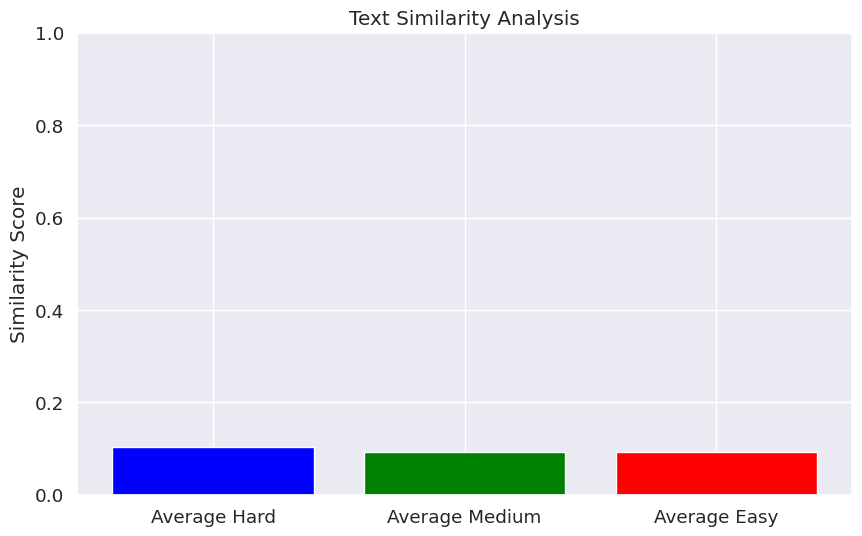

In [ ]:
# Plotting
import matplotlib.pyplot as plt

labels = [ 'Average Hard', 'Average Medium', 'Average Easy']
values = [average_similarity_hard, average_similarity_medium, average_similarity_easy]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.title('Text Similarity Analysis')
plt.ylabel('Similarity Score')
plt.ylim(0, 1)  # Assuming similarity scores range between 0 and 1
plt.show()

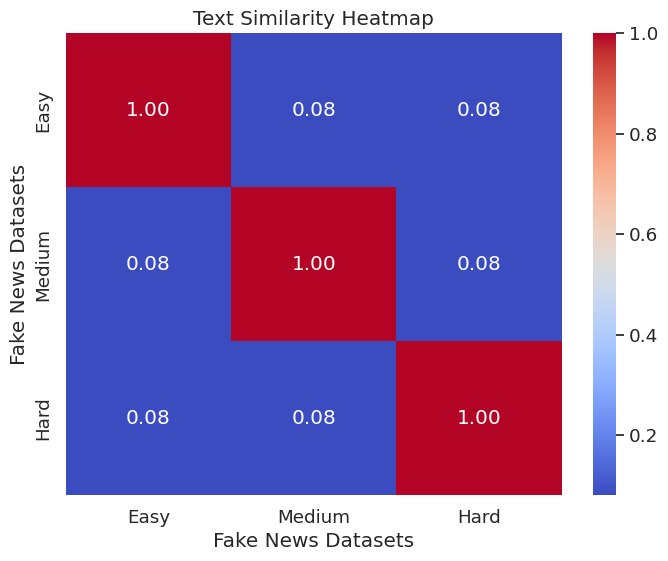

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
similarity_matrix = np.array([
    [1, similarity_easy_medium, similarity_easy_hard],
    [similarity_easy_medium, 1, similarity_medium_hard],
    [similarity_easy_hard, similarity_medium_hard, 1]
])

# Plotting heatmap
labels = ['Easy', 'Medium', 'Hard']
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels, fmt=".2f", cbar=True)
plt.title('Text Similarity Heatmap')
plt.xlabel('Fake News Datasets')
plt.ylabel('Fake News Datasets')
plt.show()

In [ ]:
# Combine the fake news from all levels of hardness into a single list
all_fake_news = easy_fake + medium_fake + hard_fake

# Create a DataFrame with the combined fake news and add a 'Label' column
df_fake_news_with_difficulty_label = pd.DataFrame({
    'News': all_fake_news,
    'Label': ['easy'] * len(easy_fake) + ['medium'] * len(medium_fake) + ['hard'] * len(hard_fake)
})
df_fake_news = pd.DataFrame({
    'News': all_fake_news,
    'Label': ['Fake'] * len(all_fake_news)
})

In [ ]:
df_fake_news

,News,Label
0,NHS Trusts embroiled in controversy over alle...,Fake
1,First NHS Commissioning Board Special Health ...,Fake
2,NHS Trusts accused of misusing 500 million te...,Fake
3,NHS England embroiled in controversy over 100...,Fake
4,NHS warns of hay fever pandemic as visits to ...,Fake
...,...,...
295,"Scandal rocks NHS dentistry as 350,000 additi...",Fake
296,Crisis deepens at Leeds Teaching Hospital NHS...,Fake
297,Scandal rocks NHS as race equality ambassador...,Fake
298,Chaos ensues as Level 3 heatwave alert trigge...,Fake


In [ ]:

fake = df_fake_news

# Create a DataFrame for the true_dataset with a single column 'Fake News' and label it as 'True'
true_df = pd.DataFrame({
    'News': [format_data(sample, i) for i in range(len(sample))],
    'Label': ['TrustWorthy'] * len(sample)
})

# Combine the hard_fake_df and true_df into a single DataFrame
combined_df = pd.concat([fake, true_df], ignore_index=True)

# Shuffle the combined DataFrame
NewsDataset = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the combined DataFrame
print(NewsDataset.head())

                                                News        Label
0  title: NHS Chief Sir Simon Stevens to stand do...  TrustWorthy
1  title: Supporting the care of patients with ac...  TrustWorthy
2  title: NHS grab a jab weekend in final drive t...  TrustWorthy
3  title: NHS invites 1215s to grab a jab at half...  TrustWorthy
4  title: Electronic Prescription Service EPS Aut...  TrustWorthy


In [ ]:
df_fake_news.to_json('FakeNewsSample100.jsonl', orient='records', lines=True)

In [ ]:
# Split the data into train and test sets, with 90% in the train set
train_df = NewsDataset.sample(frac=0.9, random_state=42)
test_df = NewsDataset.drop(train_df.index)

# Save the dataframes to .jsonl files
train_df.to_json('train.jsonl', orient='records', lines=True)
test_df.to_json('test.jsonl', orient='records', lines=True)

In [ ]:
!pip install -q accelerate==0.21.0 peft==0.4.0 bitsandbytes==0.40.2 transformers==4.31.0 trl==0.4.7

import os
import torch
from datasets import load_dataset
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
)
from peft import LoraConfig, PeftModel
from trl import SFTTrainer

In [ ]:
model_name = "meta-llama/Meta-Llama-3-8B" # meta-llama/Meta-Llama-3-8B
dataset_name = "/content/train.jsonl"
new_model = "llama-3-8b-custom"
lora_r = 64
lora_alpha = 16
lora_dropout = 0.1
use_4bit = True
bnb_4bit_compute_dtype = "float16"
bnb_4bit_quant_type = "nf4"
use_nested_quant = False
output_dir = "./results"
num_train_epochs = 1
fp16 = False
bf16 = False
per_device_train_batch_size = 4
per_device_eval_batch_size = 4
gradient_accumulation_steps = 1
gradient_checkpointing = True
max_grad_norm = 0.3
learning_rate = 2e-4
weight_decay = 0.001
optim = "paged_adamw_32bit"
lr_scheduler_type = "constant"
max_steps = -1
warmup_ratio = 0.03
group_by_length = True
save_steps = 25
logging_steps = 5
max_seq_length = None
packing = False
device_map = {"": 0}

In [ ]:
# Load datasets
train_dataset = load_dataset('json', data_files='/content/train.jsonl', split="train")
valid_dataset = load_dataset('json', data_files='/content/test.jsonl', split="train")

# Preprocess datasets
train_dataset_mapped = train_dataset.map(lambda examples: {'text': [f'[INST] <<SYS>>\n{system_prompt.strip()}\n<</SYS>>\n\n' + prompt + ' [/INST] ' + response for prompt, response in zip(train_dataset['News'], train_dataset['Label'])]}, batched=True)
valid_dataset_mapped = valid_dataset.map(lambda examples: {'text': [f'[INST] <<SYS>>\n{system_prompt.strip()}\n<</SYS>>\n\n' + prompt + ' [/INST] ' + response for prompt, response in zip(valid_dataset['News'], valid_dataset['Label'])]}, batched=True)

compute_dtype = getattr(torch, bnb_4bit_compute_dtype)
bnb_config = BitsAndBytesConfig(
    load_in_4bit=use_4bit,
    bnb_4bit_quant_type=bnb_4bit_quant_type,
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=use_nested_quant,
)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=bnb_config,
    device_map=device_map
)
model.config.use_cache = False
model.config.pretraining_tp = 1
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"
peft_config = LoraConfig(
    lora_alpha=lora_alpha,
    lora_dropout=lora_dropout,
    r=lora_r,
    bias="none",
    task_type="CAUSAL_LM",
)
# Set training parameters
training_arguments = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=num_train_epochs,
    per_device_train_batch_size=per_device_train_batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    optim=optim,
    save_steps=save_steps,
    logging_steps=logging_steps,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    fp16=fp16,
    bf16=bf16,
    max_grad_norm=max_grad_norm,
    max_steps=max_steps,
    warmup_ratio=warmup_ratio,
    group_by_length=group_by_length,
    lr_scheduler_type=lr_scheduler_type,
    report_to="all",
    evaluation_strategy="steps",
    eval_steps=5  # Evaluate every 20 steps
)
# Set supervised fine-tuning parameters
trainer = SFTTrainer(
    model=model,
    train_dataset=train_dataset_mapped,
    eval_dataset=valid_dataset_mapped,  # Pass validation dataset here
    peft_config=peft_config,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    tokenizer=tokenizer,
    args=training_arguments,
    packing=packing,
)
trainer.train()
trainer.model.save_pretrained(new_model)

# Cell 4: Test the model
logging.set_verbosity(logging.CRITICAL)
prompt = f'''[INST] <<SYS>>\n{system_prompt}\n<</SYS>>\n\n "input": {{
      "headline": "An article discusses a breakthrough in cancer research, highlighting a new treatment that shows promising results in clinical trials.",
      "content": "An article discusses a breakthrough in cancer research, highlighting a new treatment that shows promising results in clinical trials."
    }}[/INST]''' # replace the command here with something relevant to your task
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=200)
result = pipe(prompt)
print(result[0]['generated_text'])



In [ ]:
# Cell 4: Test the model
logging.set_verbosity(logging.CRITICAL)
prompt = f'''[INST] <<SYS>>\n{system_message}\n<</SYS>>\n\n "input": {{
      "headline": "An article discusses a breakthrough in cancer research, highlighting a new treatment that shows promising results in clinical trials.",
      "content": "An article discusses a breakthrough in cancer research, highlighting a new treatment that shows promising results in clinical trials."
    }}[/INST]''' # replace the command here with something relevant to your task
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=200)
result = pipe(prompt)
print(result[0]['generated_text'])



In [ ]:
from transformers import pipeline

prompt = f'''[INST] <<SYS>>\n{system_message}\n<</SYS>>\n\n "input": {{
      "headline": "a breakthrough in cancer research",
      "content": "An article discusses a breakthrough in cancer research, highlighting a new treatment that shows promising results in clinical trials."
    }}[/INST]''' # replace the command here with something relevant
num_new_tokens = 100  # change to the number of new tokens you want to generate

# Count the number of tokens in the prompt
num_prompt_tokens = len(tokenizer(prompt)['input_ids'])

# Calculate the maximum length for the generation
max_length = num_prompt_tokens + num_new_tokens

gen = pipeline('text-generation', model=model, tokenizer=tokenizer, max_length=max_length)
result = gen(prompt)
print(result[0]['generated_text'].replace(prompt, ''))